In [1]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn


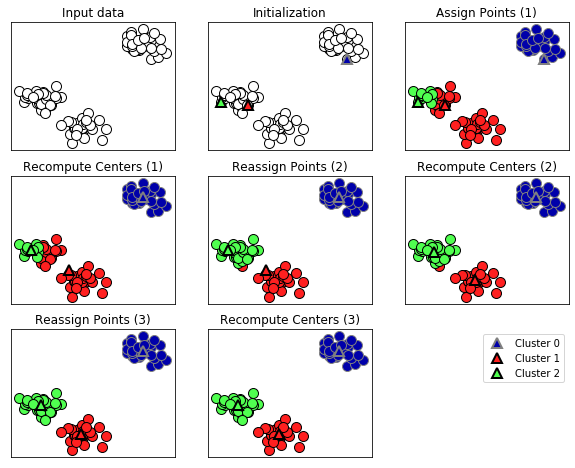

In [2]:
mglearn.plots.plot_kmeans_algorithm()

In [8]:
df = pd.read_csv( '../data5/kmean.csv', index_col = 'Unnamed: 0')

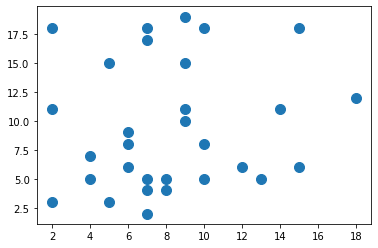

In [9]:
plt.scatter( df['x'], df['y'], s=100)
plt.show()

## 비지도 학습(군집분류)

In [10]:
k = KMeans( n_clusters=4)
km = k.fit(df)

In [12]:
type(km)

sklearn.cluster._kmeans.KMeans

In [15]:
cen = km.cluster_centers_
cen

array([[ 5.53846154,  5.53846154],
       [ 7.        , 17.14285714],
       [15.66666667, 13.66666667],
       [11.14285714,  7.28571429]])

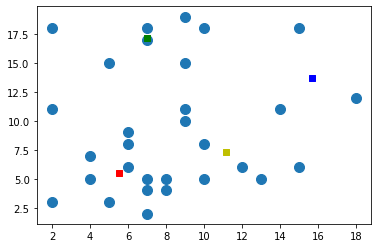

In [18]:
plt.scatter( df['x'], df['y'], s=100)
plt.scatter(  cen[:,0], cen[:,1] , marker='s' ,c=['r','g','b','y'])
plt.show()

In [19]:
km.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 3,
       3, 1, 3, 3, 2, 3, 2, 2])

In [20]:
df['label'] = km.labels_
df

,x,y,label
0,2,3,0
1,2,11,0
2,2,18,1
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,1
7,6,6,0
8,6,8,0
9,6,9,0


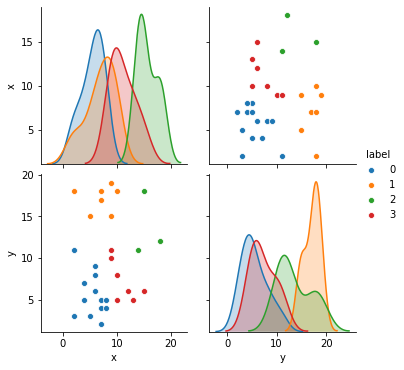

In [21]:
sb.pairplot( df, hue='label')
plt.show()

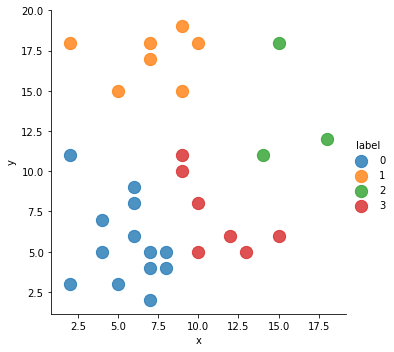

In [25]:
sb.lmplot( x='x', y='y', data=df, fit_reg=False, 
          hue ='label', scatter_kws={"s":150})
plt.show()

## 연습문제

In [30]:
from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

In [27]:
iris = load_iris()

In [50]:
x_data = iris['data']
y_data = iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df['specis']

In [70]:
model_km = make_pipeline( StandardScaler(), KMeans() )
param_value_km = {'kmeans__n_clusters':[i for i in range(1,20)]}
gridSearch_km = GridSearchCV( model_km, param_grid=param_value_km ,verbose=1)

In [71]:
gridSearch_km.fit(x_data)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
   

In [72]:
gridSearch_km.best_params_

{'kmeans__n_clusters': 18}

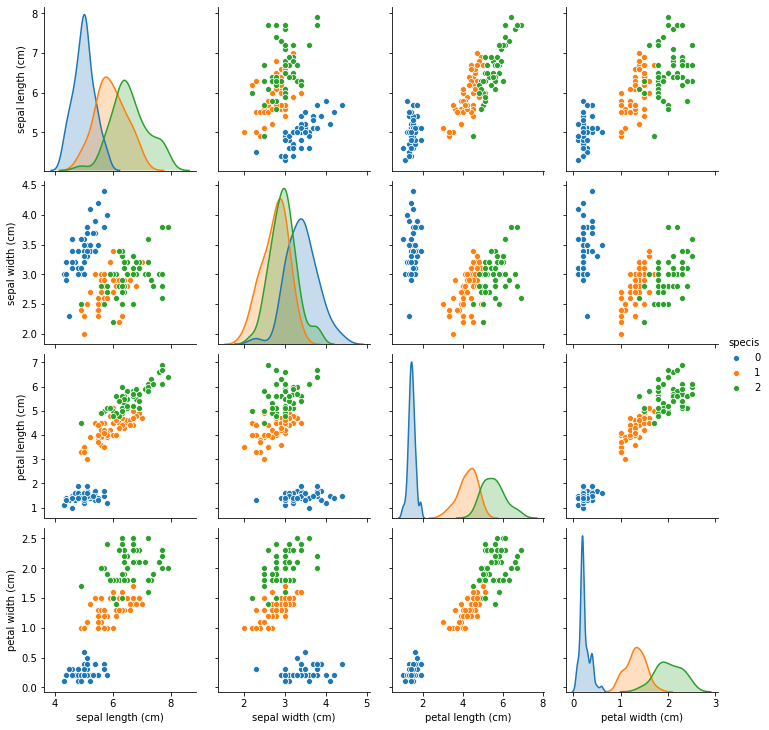

In [75]:
sb.pairplot( iris_df, hue="specis")
plt.show()

# 풀이

In [78]:
k = KMeans( n_clusters=3)
km = k.fit(x_data)

In [80]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [82]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 분류를 몇개로 할지 찾는 방법

In [85]:
km.inertia_

78.85144142614601

In [86]:
data=list()

for n in range(1,11):
    model = KMeans(n_clusters=n)
    km = model.fit(iris['data'] )
    data.append( km.inertia_)
    
data

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.066035353535355,
 34.591458020050126,
 30.06459307359308,
 28.044466570838864,
 26.04626629072682]

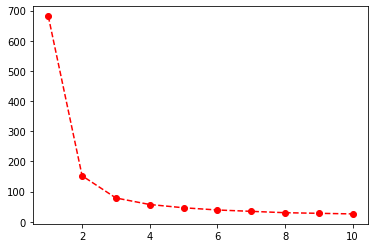

In [88]:
plt.plot( range(1,11), data,'ro--')
plt.show()